<a href="https://colab.research.google.com/github/IreneLedyaeva/CAP-5610/blob/master/HW2/problem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN architecture with hold-out validation and data augmentation

### Loading the CIFAR10 data set

In [0]:
from keras.datasets import cifar10

(non_test_images, non_test_labels), (test_images, test_labels) = cifar10.load_data()

### Splitting non-test data into training and validation

In [23]:
num_validation_samples = int(non_test_images.shape[0] * 0.2)

train_images = non_test_images[num_validation_samples:] 
validation_images = non_test_images[:num_validation_samples]

train_labels = non_test_labels[num_validation_samples:] 
validation_labels = non_test_labels[:num_validation_samples]

print('total training images:', train_images.shape[0])
print('total validation images:', validation_images.shape[0])
print('total test images:', test_images.shape[0])

total training images: 40000
total validation images: 10000
total test images: 10000


### Encoding the labels

In [0]:
from keras.utils import to_categorical

class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)

train_labels = to_categorical(train_labels, num_classes)
validation_labels = to_categorical(validation_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

### Preprocessing the data

In [0]:
train_images = train_images.astype('float32') / 255.0
validation_images = validation_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

### Adding data augmentation
Validation and test data should not be augmented

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training images
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

datagen.fit(train_images)

### Building the model

In [27]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
__________

### Compiling the model

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

### Training the model

In [30]:
history = model.fit_generator(datagen.flow(train_images, train_labels, batch_size=32),
                    steps_per_epoch=train_images.shape[0] // 32, epochs=30,
                    verbose=1,validation_data=(validation_images, validation_labels))

Epoch 1/30
1250/1250 [==============================] - 96s 77ms/step - loss: 1.1039 - acc: 0.6136 - val_loss: 1.0083 - val_acc: 0.6506
Epoch 2/30
1250/1250 [==============================] - 96s 77ms/step - loss: 1.0447 - acc: 0.6352 - val_loss: 0.9443 - val_acc: 0.6723
Epoch 3/30
1250/1250 [==============================] - 96s 77ms/step - loss: 1.0088 - acc: 0.6469 - val_loss: 0.8672 - val_acc: 0.7059
Epoch 4/30
1250/1250 [==============================] - 96s 76ms/step - loss: 0.9748 - acc: 0.6604 - val_loss: 0.8472 - val_acc: 0.7080
Epoch 5/30
1250/1250 [==============================] - 95s 76ms/step - loss: 0.9416 - acc: 0.6739 - val_loss: 0.8867 - val_acc: 0.6988
Epoch 6/30
1250/1250 [==============================] - 95s 76ms/step - loss: 0.9222 - acc: 0.6802 - val_loss: 0.9148 - val_acc: 0.6951
Epoch 7/30
1250/1250 [==============================] - 95s 76ms/step - loss: 0.9033 - acc: 0.6875 - val_loss: 0.8164 - val_acc: 0.7167
Epoch 8/30
1250/1250 [==========================

### Saving the model

In [0]:
model_fname = 'model_augment.h5' 
model.save(model_fname)

### Opening the model

In [0]:
from google.colab import files

with open(model_fname, 'r') as f:
  files.download(model_fname)

### Checking overfitting

Text(0.5, 1.0, 'Training and validation loss')

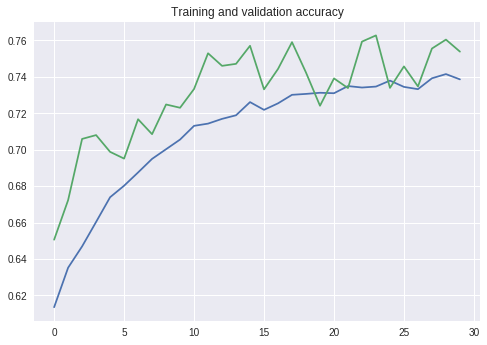

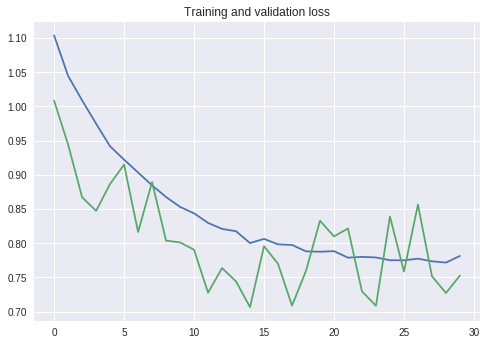

In [34]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')